# sprint13-dnn

# DNNの説明

ニューラルネットワーク（NN）というパターン認識をするように設計された、人間や動物の脳神経回路をモデルとしたアルゴリズムを多層構造化したもの。

In [98]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from collections import OrderedDict
from sklearn.model_selection import train_test_split

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [208]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')
submission = pd.read_csv('./input/sample_submission.csv')


In [209]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [210]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [103]:
X = train_df.drop('label', axis=1)
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
#教師
y = pd.get_dummies(train_df['label'])
y.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [87]:
y = np.array(y)
y

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [130]:
x = np.array(X)
x[785]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   8,  76, 147, 193, 233, 246, 122,   8,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   8, 198, 254, 254, 254, 254, 254,
       254,  81,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  11, 252, 253, 24

In [138]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

img = x[2]
label = y[2]
print(label)

print(img.shape)  
img = img.reshape(28, 28)  
print(img.shape)  

img_show(img)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       0
22       1
23       0
24       1
25       0
26       0
27       0
28       0
29       0
        ..
41970    1
41971    0
41972    0
41973    0
41974    0
41975    0
41976    1
41977    0
41978    0
41979    0
41980    0
41981    1
41982    0
41983    0
41984    0
41985    0
41986    0
41987    0
41988    0
41989    0
41990    0
41991    0
41992    0
41993    0
41994    0
41995    0
41996    0
41997    0
41998    0
41999    0
Name: 2, dtype: uint8
(784,)
(28, 28)


# 勾配爆発/消失

勾配消失とは、多層ニューラルネットワークで層を深くしていくと，損失関数の重みとバイアスのパラメータ勾配が入力層に辿り着くまでに劇的にゼロに近づいてしまうという現象を勾配消失、反対にかなり大きくなってしまう現象を勾配爆発という。

# Optimizerの実装

- SGD
- Adam
- Adagrad


In [212]:
class SGD:
    def __init__(self,lr=0.01):
        self.lr=lr
        
    def update(self,grads,params):
        for key in params.keys():
            params[key] -= self.lr*grads[key]

In [213]:
class Adam:

    def __init__(self,lr=0.001,beta=0.09,beta2=0.999):
        self.lr = lr
        self.beta1=beta1
        self.beta2=beta2
        self.iter =0
        self.m=None
        self.v=None
        
    def update(self,params,grads):
        if self.m is None:
            self.m,self.v = {},{}
            for key,val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
            
        self.iter += 1
        lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)
        
        for key in params.keys():
            
            self.m[key] += (1 - self.beta1)*(grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2)*(grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

In [214]:
class Aagrad:
    
    def __init__(self,lr = 0.01):
        self.lr = lr
        self.h = None
        
    def update(self,params,grads):
        if self.h is None:
            self.h = {}
            for key,val in params.items():
                self.h[key] = np.zeros_like(val)
                
        
        for key in params.key():
            self.h[key] += grads[key]**2
            params[key] -= self.lr*grads[key]/(np.sart(self.h[key]) + 1e-7)


# 重みの初期化

- He
- ガウス
- xavier


## He

In [215]:
def he(node_num):
    W = np.random.randn(node_num, node_num)*sqrt(2/node_num)
    return W

## ガウス


In [216]:
def gauss(node_num):
    W = np.random.randn(node_num, node_num)
    return W

## xavier

In [217]:
def xavier(node_num):
    W = np.random.randn(node_num, node_num)*sqrt(1/node_num)
    return W

# Batch Normalization

- 順伝播と逆伝播を実装する

In [204]:
class BatchNormalization:
    
    def __init__(self,gamma,beta,momentum=0.9,running_mean=None,running_var=None):  
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        # Conv層の場合は4次元、全結合層の場合は2次元  
        self.input_shape = None
        
        # テスト時に使用する平均と分散
        self.running_mean = running_mean
        self.running_var = running_var
        
        # backward時に使用する中間データ
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None
        
        
    def forward(self,x,train_flg = True):
        self.input_shape = x.shape
        if x.ndim != 2:
            N,C,H,W = x.shape
            x = x.reshape(N,-1)
            
        out = self.__forward(x,train_flg)
        
        return out.redshape(*self.input_shape)

    def __forward(self,x,train_flg):
        if self.running_mean is None:
            N,D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
        
        
        if train_flg:
            mu = x.mean(axis = 0)
            xc = x - mu
            var = np.mean(xc**2,axis=0)
            std = np.sqrt(v
                        ￥」ar + 10e-7)
            xn = xc / std
            self.running_mean = self.momentum * self.running_mena + (1-self.momentum)
            self.running_var = self.momentum * self.running_var + (1-self.momentum)*var
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta
        return out
    
    def backward(self,dout):
        if dout.ndim != 2:
            N,C,H,W = dout.dshape
            dout = dout.reshape(N, -1)
            
        dx = self.__backward(dout)
        
        dx = dx.reshape(*self.input_shape)
        return dx
    
    def __backward(self, dout):
        dbata = dout.sum(axis = 0)
        dgamma = np.sum(self.xn * dout, axis = 0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis = 0)
        dvar = 0.5 * dstd / self.std
        dxc +=(2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis = 0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx

# Drop Out

In [190]:
class DropOut:
    
    def  __init__(self,dropout_ratio=0.5):
        self.dropout_ratio =dropout_ratio
        self.mask=None
        
    def forward(self,x,train_flag=True):
        if train_flag:
            self.mask = np.random.rand(*x.shape) >self.dropout_ratio
            return x*self.mask
        else:
            return x*(1.0 - self.dropout_ratio)
    
    def backward(self,dout):
        dx = self.mask*dout
        return dx

# 関数を呼び出す

In [191]:
# シグモイド関数
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

In [192]:
# ソフトマックス関数
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis=1, keepdims=True)

In [193]:
# フォワードプロパゲーション関数
def forward(x, W1, W2, b1, b2):
    
    z1=x.dot(W1)+b1
    a1=np.tanh(z1)

    z2=a1.dot(W2)+b2
    y = softmax_function(z2)
    return y

In [194]:
def cross_entropy_error(y,t, W1, W2,W3, lam):
    batch_size= y.shape[0]
    return -(np.sum(t*np.log(y + 1e-7))+(lam/2)*((W1**2).sum()+(W2**2).sum() + (W3**2).sum()))/batch_size

# 4層のケース

In [195]:
class MultiLayerNet:
    
    def __init__(self,input_size, hidden_size,output_size,lam=0.1,lr=0.01):
        #重みの初期化
        self.params = {}
        self.params['W1'] = np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = np.random.randn(hidden_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = np.random.randn(hidden_size,output_size)
        self.params['b3'] = np.zeros(output_size)
        self.lam = lam
        self.lr = lr
        
    def predict(self,x):
        W1,W2,W3 = self.params['W1'],self.params['W2'] ,self.params['W3']
        b1,b2,b3 = self.params['b1'],self.params['b2'],self.params['b3']
        
        z1 = np.dot(x,W1)+b1
        a1=np.tanh(z1)
        z2=np.dot(a1,W2)+b2
        a2=np.tanh(z2)
        z3=np.dot(a2,W3)+b3
        
        y = softmax(z3)
               
        return y
    
    def loss(self,x,t,lam):
        W1,W2,W3 = self.params['W1'],self.params['W2'] ,self.params['W3']
        b1,b2,b3 = self.params['b1'],self.params['b2'],self.params['b3']
        y = self.predict(x)
        
        return cross_entropy_error(y,t,W1,W2,W3,lam)
    
    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        
        accuracy = np.sum(y==t) / float(x.shape[0])
        
        return accuracy
    
    def gradient(self,x,t):
        self.lam
        W1,W2,W3 = self.params['W1'],self.params['W2'] ,self.params['W3']
        b1,b2,b3 = self.params['b1'],self.params['b2'],self.params['b3']
        grads={}
        
        batch_num = x.shape[0]
        #forward
        
        z1 = np.dot(x,W1)+b1
        a1=np.tanh(z1)
        z2=np.dot(a1,W2)+b2
        a2=np.tanh(z2)
        z3=np.dot(a2,W3)+b3
        
        y = softmax(z3)
        
        #backward
        dy = (y-t)/batch_num
    
        grads['W3'] = np.dot(a2.T, dy) + self.lam*W3
        grads['b3']  = dy.sum(axis=0)
        
        da2 = (1 - np.tanh(z2)**2)*(dy.dot(W3.T))
        grads['W2'] = np.dot(a1.T,da2) + self.lam*W2
        grads['b2']  = da2.sum(axis=0)
        
        da1 = (1 - np.tanh(z1)**2)*(da2.dot(W2.T))
        grads['W1'] = np.dot(x.T,da1) + self.lam*W1
        grads['b1']  = da1.sum(axis=0)
        
        
#         w1= w1 - alpha*(np.dot(X.T, delta2))
#         w2= w2 - alpha*(np.dot(a1.T, delta3))
#         b1 = b1 - alpha*delta2.sum(axis=0)
#         b2 = b2 - alpha*delta3.sum(axis=0)

        
        return grads

In [196]:
import pandas as pd
def get_data():
    train = pd.read_csv('./input/train.csv')
    test= pd.read_csv('./input/test.csv')
    X = train.drop(["label"],axis=1)
    X =X.values
    y = np.array(train["label"])

    n_labels = len(np.unique(y))  # 分類クラスの数 = 10
    y = np.eye(n_labels)[y]
    
    return X,y

In [197]:
import numpy as np
from sklearn.model_selection import train_test_split


X,y = get_data()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

train_loss_list = []
train_acc_list= []
test_acc_list = []
# １エポックあたりの繰り返し数
train_size = X_train.shape[0]

#hyper-parameter
iter_num = 100000
batch_size = 16
lr = 0.001
lam = 0.1

iter_per_epoch = max(train_size/batch_size,1)

network = MultiLayerNet(input_size = 784, hidden_size=100,output_size = 10)

for i in range(iter_num):
    #ミニバッチ学習、ランダムにミニバッチを取得
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = X_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    # 勾配の計算
    grads = network.gradient(x_batch,y_batch)
    
    for key in ('W1','b1','W2','b2','W3','b3'):
        network.params[key] -= lr*grads[key]
    
    loss = network.loss(x_batch,y_batch,lam)
    train_loss_list.append(loss)
    #accuracy = network.accuracy(x_batch,y_batch)
    
    #1エポックごとに精度を計算
    if  i % iter_per_epoch ==0:
        train_acc = network.accuracy(X_train,y_train)
        test_acc = network.accuracy(X_test,y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train_acc, test_acc | " + str(train_acc) + " " + str(test_acc))

train_acc, test_acc | 0.08645833333333333 0.09488095238095239
train_acc, test_acc | 0.23907738095238096 0.24285714285714285
train_acc, test_acc | 0.352797619047619 0.345
train_acc, test_acc | 0.45458333333333334 0.4564285714285714
train_acc, test_acc | 0.5242857142857142 0.5161904761904762
train_acc, test_acc | 0.5973809523809523 0.5891666666666666
train_acc, test_acc | 0.6714880952380953 0.6721428571428572
train_acc, test_acc | 0.7176190476190476 0.7226190476190476
train_acc, test_acc | 0.7567559523809524 0.7569047619047619
train_acc, test_acc | 0.7908928571428572 0.7882142857142858
train_acc, test_acc | 0.8160714285714286 0.8080952380952381
train_acc, test_acc | 0.8302380952380952 0.8223809523809524
train_acc, test_acc | 0.8429166666666666 0.8423809523809523
train_acc, test_acc | 0.8538690476190476 0.8539285714285715
train_acc, test_acc | 0.8714285714285714 0.8654761904761905
train_acc, test_acc | 0.8783928571428572 0.8744047619047619
train_acc, test_acc | 0.8877678571428571 0.880833

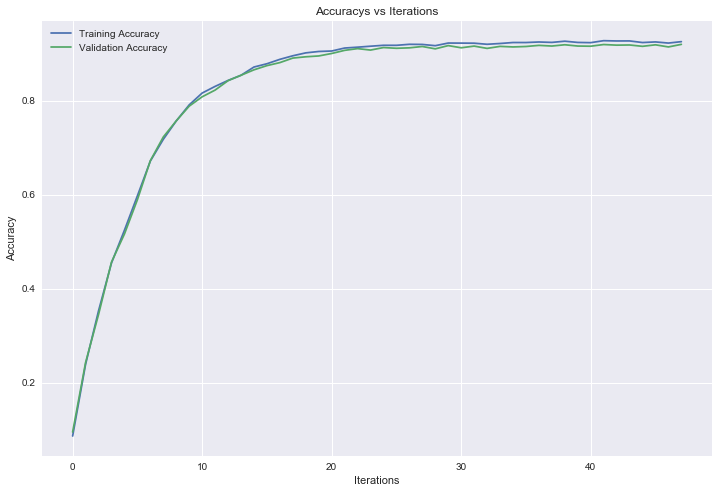

In [198]:
import matplotlib.pyplot as plt
import matplotlib
def accuracy_plot(train_acc, test_acc):
        plt.figure(figsize=(12,8))
        plt.title("Accuracys vs Iterations")
        plt.xlabel('Iterations')
        plt.ylabel('Accuracy')
        plt.plot(train_acc, label="Training Accuracy")
        plt.plot(test_acc, label="Validation Accuracy")
        plt.legend()
        plt.show()

# alpha=0.01
# iterations=500
# lam=0.1

#past_train_costs, past_valid_costs,weight_bias,train_accuracys, valid_accuracys=gradient_descent(X,y,alpha,iterations,lam)
accuracy_plot(train_acc_list, test_acc_list)

# 5層のケース

In [199]:
def cross_entropy_error(y,t, W1, W2,W3,W4, lam):
    batch_size= y.shape[0]
    return -(np.sum(t*np.log(y + 1e-7))+(lam/2)*((W1**2).sum()+(W2**2).sum() +
                                                  (W3**2).sum()+(W4**2).sum()))/batch_size


In [200]:
class Layer5Net:
    
    def __init__(self,input_size, hidden_size,output_size,lam=0.1,lr=0.01):
        #重みの初期化
        self.params = {}
        self.params['W1'] = np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = np.random.randn(hidden_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = np.random.randn(hidden_size,hidden_size)
        self.params['b3'] = np.zeros(hidden_size)
        self.params['W4'] = np.random.randn(hidden_size, output_size)
        self.params['b4'] = np.zeros(output_size)
        self.lam = lam
        self.lr = lr
        
    def predict(self,x):
        W1,W2,W3,W4 = self.params['W1'],self.params['W2'] ,self.params['W3'], self.params['W4']
        b1,b2,b3,b4 = self.params['b1'],self.params['b2'],self.params['b3'],self.params['b4']
        
        z1 = np.dot(x,W1)+b1
        a1=np.tanh(z1)
        z2=np.dot(a1,W2)+b2
        a2=np.tanh(z2)
        z3=np.dot(a2,W3)+b3
        a3=np.tanh(z3)
        z4=np.dot(a3,W4)+b4
        
        y = softmax(z4)
               
        return y
    
    def loss(self,x,t,lam):
        W1,W2,W3,W4 = self.params['W1'],self.params['W2'], self.params['W3'], self.params['W4']
        b1,b2,b3,b4 = self.params['b1'],self.params['b2'],self.params['b3'],self.params['b4']
        y = self.predict(x)
        
        return cross_entropy_error(y,t,W1,W2,W3,W4,lam)
    
    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        
        accuracy = np.sum(y==t) / float(x.shape[0])
        
        return accuracy
    
    def gradient(self,x,t):
        self.lam
        W1,W2,W3,W4 = self.params['W1'],self.params['W2'] ,self.params['W3'],self.params['W4']
        b1,b2,b3,b4 = self.params['b1'],self.params['b2'],self.params['b3'],self.params['b4']
        grads={}
        
        batch_num = x.shape[0]
        #forward
        
        z1 = np.dot(x,W1)+b1
        a1=np.tanh(z1)
        z2=np.dot(a1,W2)+b2
        a2=np.tanh(z2)
        z3=np.dot(a2,W3)+b3
        a3=np.tanh(z3)
        z4=np.dot(a3,W4)+b4
        
        y = softmax(z4)
        
        #backward
        dy = (y-t)/batch_num
    
        grads['W4'] = np.dot(a3.T, dy) + self.lam*W4
        grads['b4']  = dy.sum(axis=0)
 
        da3 = (1 - np.tanh(z3)**2)*(dy.dot(W4.T))
        grads['W3'] = np.dot(a2.T,da3) + self.lam*W3
        grads['b3']  = da3.sum(axis=0)
        
        da2 = (1 - np.tanh(z2)**2)*(da3.dot(W3.T))
        grads['W2'] = np.dot(a1.T,da2) + self.lam*W2
        grads['b2']  = da2.sum(axis=0)
        
        da1 = (1 - np.tanh(z1)**2)*(da2.dot(W2.T))
        grads['W1'] = np.dot(x.T,da1) + self.lam*W1
        grads['b1']  = da1.sum(axis=0)
        
        return grads

In [201]:
import pandas as pd
def get_data():
    train = pd.read_csv('./input/train.csv')
    test= pd.read_csv('./input/test.csv')
    X = train.drop(["label"],axis=1)
    X =X.values
    y = np.array(train["label"])

    n_labels = len(np.unique(y))  # 分類クラスの数 = 10
    y = np.eye(n_labels)[y]
    
    return X,y

In [202]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = get_data()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

train_loss_list = []
train_acc_list= []
test_acc_list = []
# １エポックあたりの繰り返し数
# train_size = X_train.shape[0]

#hyper-parameter
iter_num = 100000
batch_size = 16
lr = 0.001
lam = 0.1

iter_per_epoch = max(train_size/batch_size,1)

network = Layer5Net(input_size = 784, hidden_size=100,output_size = 10,lr=0.001)

for i in range(iter_num):
    #ミニバッチ学習、ランダムにミニバッチを取得
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = X_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    # 勾配の計算
    grads = network.gradient(x_batch,y_batch)
    
    for key in ('W1','b1','W2','b2','W3','b3','W4','b4'):
        network.params[key] -= lr*grads[key]
    
    loss = network.loss(x_batch,y_batch,lam)
    train_loss_list.append(loss)
    #accuracy = network.accuracy(x_batch,y_batch)
    
    #1エポックごとに精度を計算
    if  i % iter_per_epoch ==0:
        train_acc = network.accuracy(X_train,y_train)
        test_acc = network.accuracy(X_test,y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train_acc, test_acc | " + str(train_acc) + " " + str(test_acc))

train_acc, test_acc | 0.11386904761904762 0.11166666666666666
train_acc, test_acc | 0.22345238095238096 0.21678571428571428
train_acc, test_acc | 0.31300595238095236 0.31
train_acc, test_acc | 0.3962202380952381 0.39285714285714285
train_acc, test_acc | 0.4781845238095238 0.4695238095238095
train_acc, test_acc | 0.573125 0.5628571428571428
train_acc, test_acc | 0.652172619047619 0.6377380952380952
train_acc, test_acc | 0.7095535714285715 0.7036904761904762
train_acc, test_acc | 0.7462797619047619 0.738452380952381
train_acc, test_acc | 0.780327380952381 0.7720238095238096
train_acc, test_acc | 0.8025595238095238 0.7960714285714285
train_acc, test_acc | 0.8208333333333333 0.8210714285714286
train_acc, test_acc | 0.8336607142857143 0.8279761904761904
train_acc, test_acc | 0.8454464285714286 0.8405952380952381
train_acc, test_acc | 0.8560416666666667 0.8547619047619047
train_acc, test_acc | 0.8657738095238096 0.8648809523809524
train_acc, test_acc | 0.8745833333333334 0.8685714285714285
t

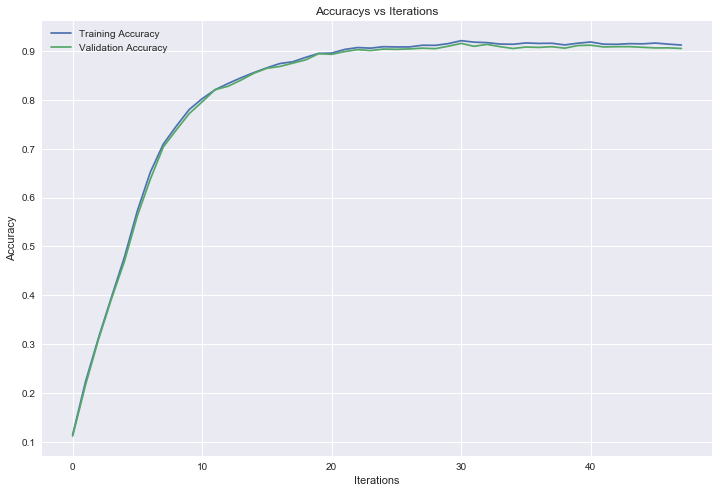

In [203]:
def accuracy_plot(train_acc, test_acc):
        plt.figure(figsize=(12,8))
        plt.title("Accuracys vs Iterations")
        plt.xlabel('Iterations')
        plt.ylabel('Accuracy')
        plt.plot(train_acc, label="Training Accuracy")
        plt.plot(test_acc, label="Validation Accuracy")
        plt.legend()
        plt.show()

accuracy_plot(train_acc_list, test_acc_list)

In [218]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict
from sklearn.model_selection import train_test_split
%matplotlib inline

train_df = pd.read_csv("train.csv")
X = train_df.drop('label', axis=1)
y = pd.get_dummies(train_df['label'])
X = np.array(X)
y = np.array(y)

FileNotFoundError: File b'train.csv' does not exist